In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
path = './data/train.csv'
df = pd.read_csv(path)

In [3]:
#reading the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#changing column to category type
columns = ['Survived', 'Pclass', 'Embarked', 'Parch', 'SibSp']
df[columns] = df[columns].astype('category')


In [6]:
#drop name, passsengerid, ticket columns 
cols = ['Name', 'PassengerId', 'Ticket']
df.drop(cols, axis=1, inplace=True)

In [7]:
#dataframe shape
df.shape

(891, 9)

In [8]:
#dataframe statistical summary
df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
#total missing data function
def nun_missing_values(df):
    total_missing = df.isnull().sum()
    total_missing = total_missing[total_missing > 0]
    total_missing.sort_values(inplace=True)
    return total_missing

In [10]:
nun_missing_values(df)

Embarked      2
Age         177
Cabin       687
dtype: int64

In [11]:
#returning the dataframe with the nun columns dropped
def drop_columns_40_percent_missing(df):
    nun_columns = df.isnull().sum()
    nun_columns = nun_columns[nun_columns > len(df) * 0.4]
    nun_columns.sort_values(inplace=True)
    df.drop(nun_columns.index, axis=1, inplace=True)
    print('\nDropped columns with more than 40% missing values: {}'.format(nun_columns.sum()))
    return df

In [12]:
#dropping the columns with more than 40% missing values
drop_columns_40_percent_missing(df)


Dropped columns with more than 40% missing values: 687


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
#counting duplicates in the dataframe
df.duplicated().sum()

111

In [14]:
#filling missing values in age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
#filling missing values in embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(5), float64(2), object(1)
memory usage: 26.4+ KB


In [17]:
#function for extracting the numerical features
def numeric_features(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_features

In [18]:
#function for extracting the categorical features
def categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns
    return categorical_features

In [19]:
numeric_columns = numeric_features(df)
categorical_columns = categorical_features(df)

<AxesSubplot:>

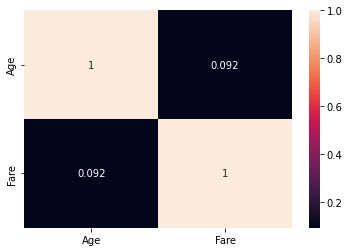

In [20]:
#dataframe correlation
corr = df.corr()
sns.heatmap(corr, annot=True)

In [21]:
#getting distribution of numeric features
for col_name in numeric_columns:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Age:
 - Range: 79.58
 - Variance: 169.05
 - Std.Dev: 13.00

Fare:
 - Range: 512.33
 - Variance: 2469.44
 - Std.Dev: 49.69


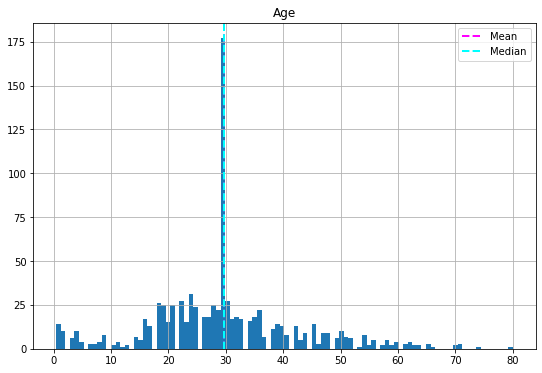

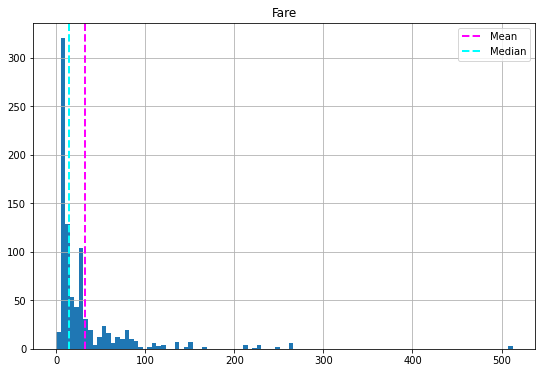

In [22]:
#getting distribution of numeric features with plots

for col in numeric_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    plt.legend()
    plt.show()



Statistical analysis of Survived:
0    549
1    342
Name: Survived, dtype: int64


Descriptive statistics of Survived:
count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64


Histogram of Survived:


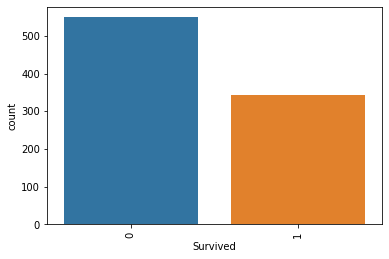



Statistical analysis of Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Descriptive statistics of Pclass:
count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64


Histogram of Pclass:


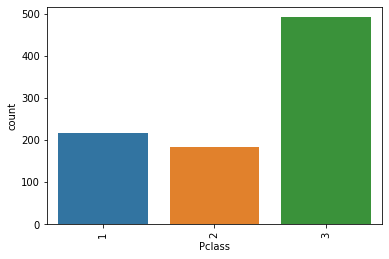



Statistical analysis of Sex:
male      577
female    314
Name: Sex, dtype: int64


Descriptive statistics of Sex:
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Histogram of Sex:


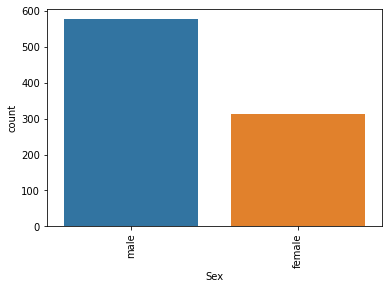



Statistical analysis of SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Descriptive statistics of SibSp:
count     891
unique      7
top         0
freq      608
Name: SibSp, dtype: int64


Histogram of SibSp:


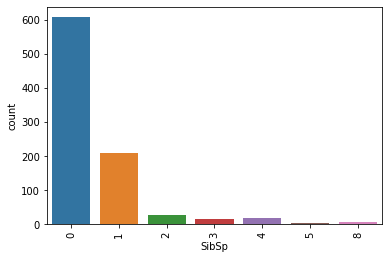



Statistical analysis of Parch:
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


Descriptive statistics of Parch:
count     891
unique      7
top         0
freq      678
Name: Parch, dtype: int64


Histogram of Parch:


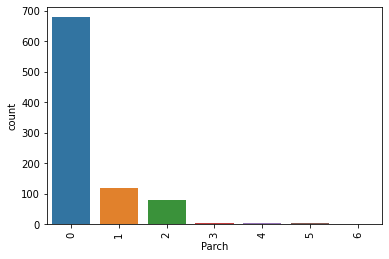



Statistical analysis of Embarked:
S    646
C    168
Q     77
Name: Embarked, dtype: int64


Descriptive statistics of Embarked:
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


Histogram of Embarked:


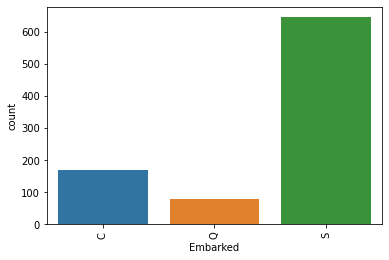

In [23]:
#statistical analysis of categorical features
for feature in categorical_columns:
    print('\n')
    print('Statistical analysis of {}:'.format(feature))
    print(df[feature].value_counts())
    print('\n')
    print('Descriptive statistics of {}:'.format(feature))
    print(df[feature].describe())
    print('\n')
    print('Histogram of {}:'.format(feature))
    sns.countplot(x=feature, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [24]:
#bivariate data exploration
def plot_bivariate (arr_1, arr_2, df, kind):
    '''
    This function will plot a bivariate graph and display it
    arr_1: first array
    arr_2: second array
    df: dataframe
    kind: kind of plot
    '''
    for col_1 in arr_1:
        for col_2 in arr_2:
            plt.figure(figsize=(20,5))
            sns.catplot(x=col_1, y=col_2, data=df, kind=kind)
            plt.xticks(rotation=90)
            plt.show();

<Figure size 1440x360 with 0 Axes>

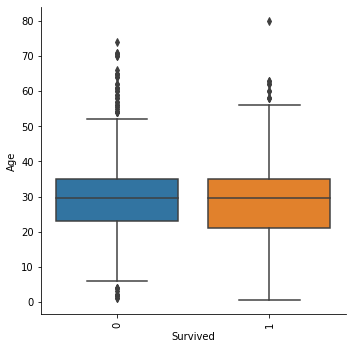

<Figure size 1440x360 with 0 Axes>

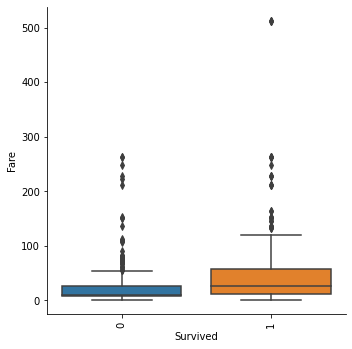

<Figure size 1440x360 with 0 Axes>

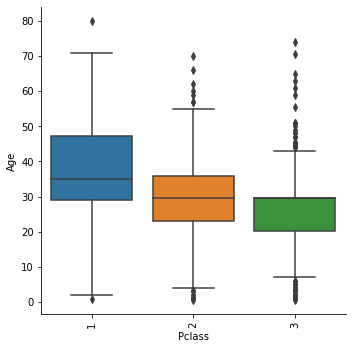

<Figure size 1440x360 with 0 Axes>

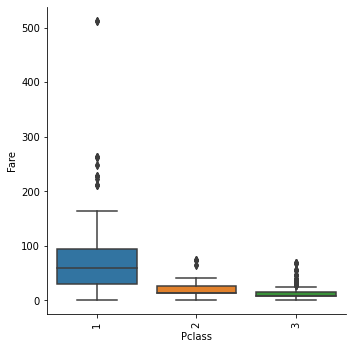

<Figure size 1440x360 with 0 Axes>

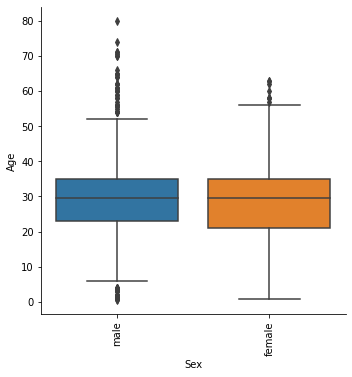

<Figure size 1440x360 with 0 Axes>

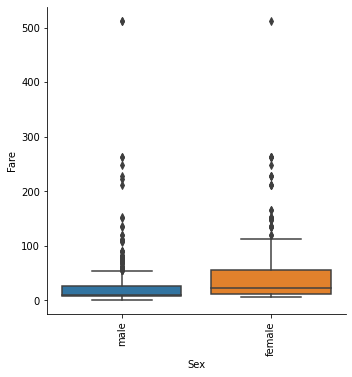

<Figure size 1440x360 with 0 Axes>

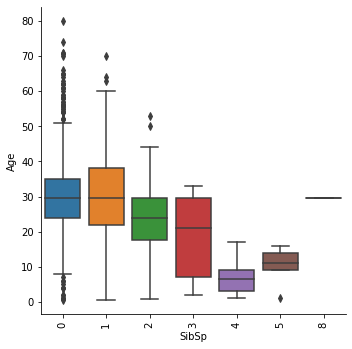

<Figure size 1440x360 with 0 Axes>

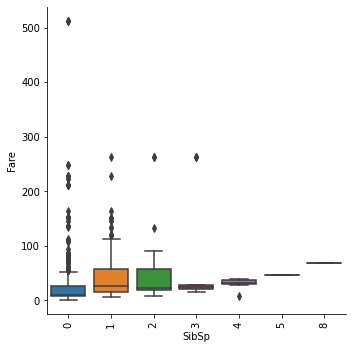

<Figure size 1440x360 with 0 Axes>

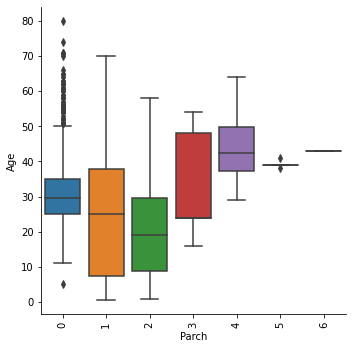

<Figure size 1440x360 with 0 Axes>

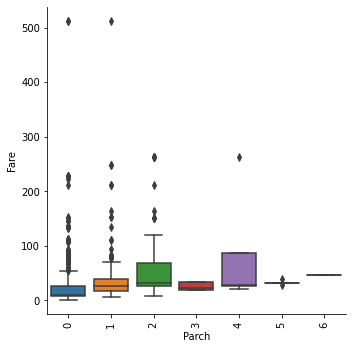

<Figure size 1440x360 with 0 Axes>

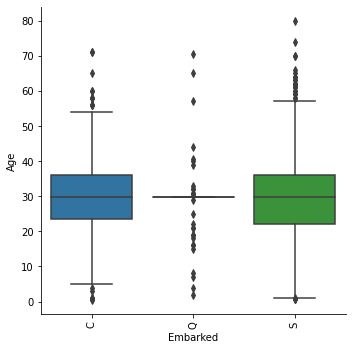

<Figure size 1440x360 with 0 Axes>

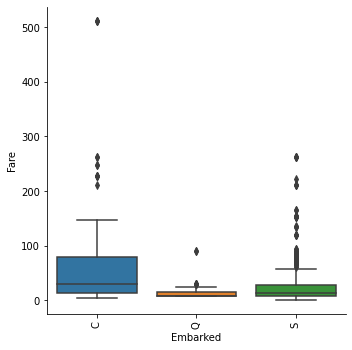

In [25]:
plot_bivariate (categorical_columns, numeric_columns, df, 'box')

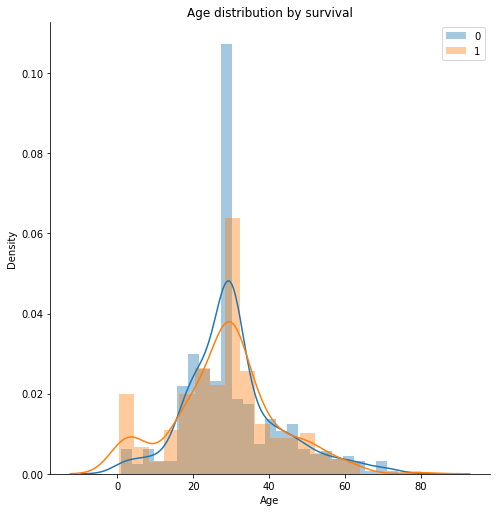

In [26]:
sns.FacetGrid(df, hue='Survived', size=7).map(sns.distplot, 'Age')
plt.title('Age distribution by survival')
plt.legend()
plt.show()


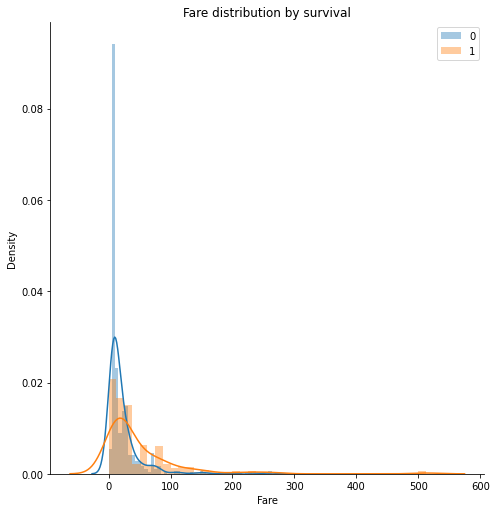

In [27]:
sns.FacetGrid(df ,hue='Survived' ,size=7).map(sns.distplot, 'Fare')
plt.title('Fare distribution by survival')
plt.legend()
plt.show()

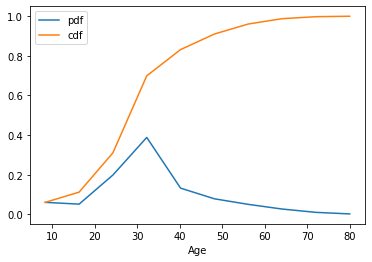

In [28]:
#pdf and cdf
counts,bin_edges = np.histogram(df['Age'], bins=10, density=True)
plt.xlabel('Age')
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['pdf', 'cdf'])
plt.show()

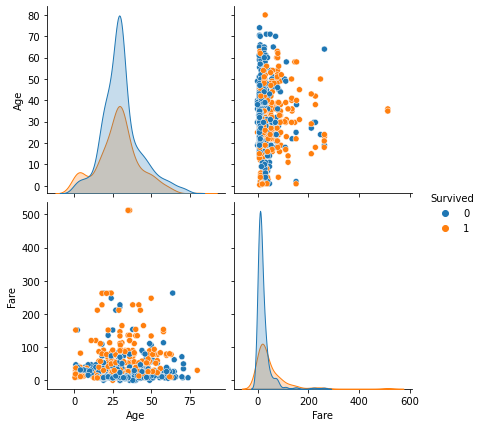

In [29]:
#pairplot of numeeric features by survival
sns.pairplot(df ,hue='Survived' ,size=3)
plt.show()

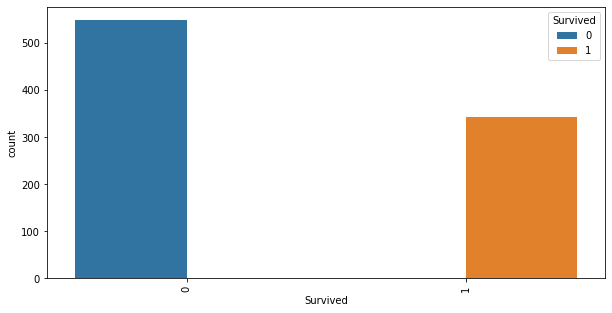

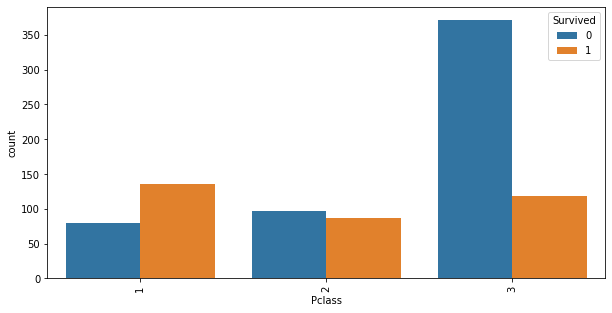

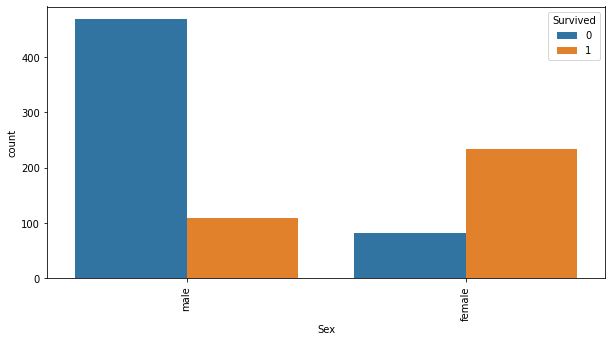

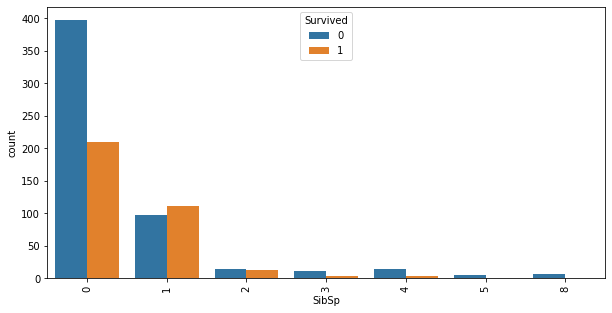

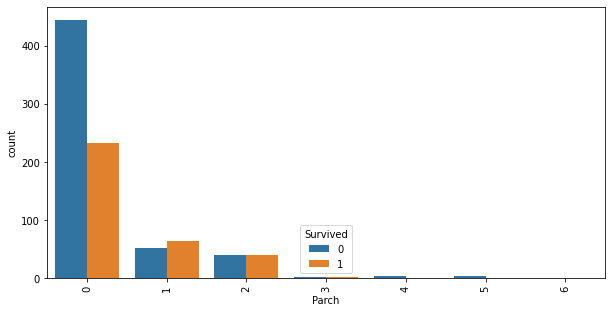

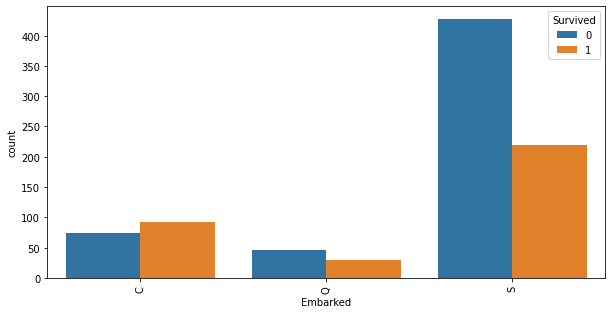

In [30]:
#ploting Survival vs categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, hue='Survived')
    plt.xticks(rotation=90)
    plt.show()
